In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

from function_examples import *

%load_ext autoreload
%autoreload 2

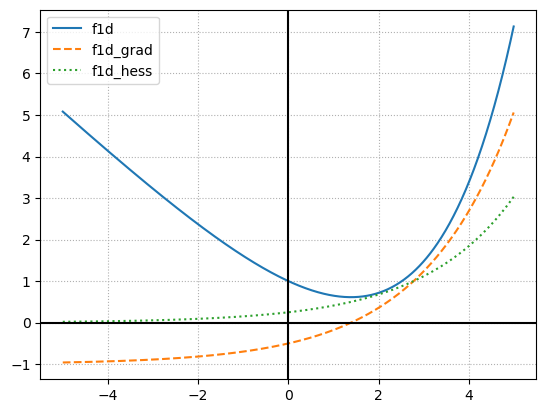

In [2]:
# Plot the 1D convex function
x = np.arange(-5, 5, 0.01)
plot_function_1d(f1d, f1d_grad, f1d_hess, x)

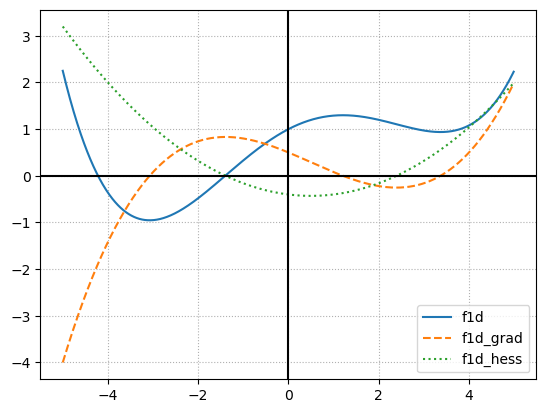

In [3]:
# Plot the 1D non-convex function
x = np.arange(-5, 5, 0.01)
plot_function_1d(f1d_nonconvex, f1d_nonconvex_grad, f1d_nonconvex_hess, x)

In [4]:
def newton(f, f_grad, f_hess, initial_x, epsilon=1e-12, print_all=True):
    nb_iterations = 0
    x_prev = initial_x - 2 * epsilon
    x = initial_x
    x_graph = [initial_x]
    y_graph = [f(initial_x)]
    while (abs(x - x_prev) >= epsilon):
        nb_iterations += 1
        x_prev = x
        # Newton's method
        x = x - (f_grad(x) / f_hess(x))
        x_graph.append(x)
        y_graph.append(f(x))
        if (print_all):
            print(f"Iteration {nb_iterations}, x = {x}, f(x) = {f(x)}")
    if (print_all):
        print(f"#iterations = {nb_iterations}, #gradient = {nb_iterations}, #hessian = {nb_iterations}")
    return x_graph, y_graph

Iteration 1, x = 4.968000066450698, f(x) = 7.021125465028981
Iteration 2, x = 3.30163574233859, f(x) = 1.9096044655047812
Iteration 3, x = 2.069207345347726, f(x) = 0.744783407811874
Iteration 4, x = 1.4906761243437932, f(x) = 0.6164775391853983
Iteration 5, x = 1.3889714737681689, f(x) = 0.613707431412855
Iteration 6, x = 1.3862961520537458, f(x) = 0.6137056388809112
Iteration 7, x = 1.3862943611206926, f(x) = 0.6137056388801094
Iteration 8, x = 1.3862943611198906, f(x) = 0.6137056388801094
#iterations = 8, #gradient = 8, #hessian = 8


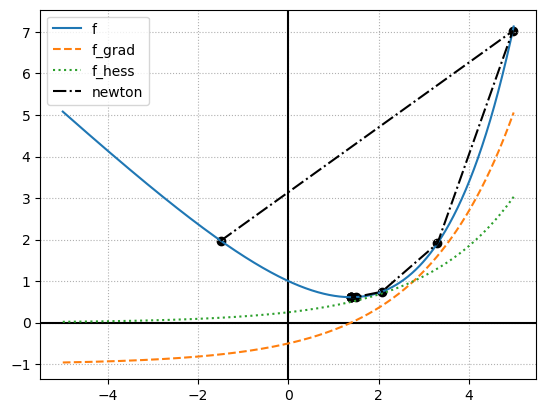

In [5]:
initial_x = -1.5
x1_newton, y1_newton = newton(f1d, f1d_grad, f1d_hess, initial_x)
plot_convergence_1d(f1d, f1d_grad, f1d_hess, x, x1_newton, y1_newton, 'newton')

In [6]:
def secant(f, f_grad, initial_x, epsilon=1e-12, print_all=True):
    # Store previous x and f_grad to reduce the number of function calls
    nb_iterations = 0
    x_prev = initial_x - 2 * epsilon
    x = initial_x
    f_grad_prev = f_grad(x_prev)
    f_grad_curr = 0
    x_graph = [x_prev, x]
    y_graph = [f(x_prev), f(x)]
    while (abs(x - x_prev) >= epsilon):
        nb_iterations += 1
        # Secant's method
        # Use approximation f''(x) = (f'(x_t) - f'(x_{t-1})) / (x_t - x_{t-1})
        f_grad_curr = f_grad(x)
        f_hess = (f_grad_curr - f_grad_prev) / (x - x_prev)
        # Update variables
        x_prev = x
        f_grad_prev = f_grad_curr
        x = x - (f_grad_curr / f_hess)
        x_graph.append(x)
        y_graph.append(f(x))
        if (print_all):
            print(f"Iteration {nb_iterations}, x = {x}, f(x) = {f(x)}")
    if (print_all):
        print(f"#iterations = {nb_iterations}, #gradient = {nb_iterations + 1}")
    return x_graph, y_graph

Iteration 1, x = 4.965880855010188, f(x) = 7.010547658579854
Iteration 2, x = -0.641390589365697, f(x) = 1.3670349143571014
Iteration 3, x = -0.006265244619030552, f(x) = 1.0031375238512201
Iteration 4, x = 2.342725077049625, f(x) = 0.883660642767131
Iteration 5, x = 1.050618856004873, f(x) = 0.6403631486142944
Iteration 6, x = 1.3106703788025555, f(x) = 0.6151175341004083
Iteration 7, x = 1.3928615229719474, f(x) = 0.6137164325945856
Iteration 8, x = 1.3861694891954561, f(x) = 0.6137056427782777
Iteration 9, x = 1.3862941562164224, f(x) = 0.6137056388801199
Iteration 10, x = 1.3862943611262875, f(x) = 0.6137056388801092
Iteration 11, x = 1.3862943611198908, f(x) = 0.6137056388801092
Iteration 12, x = 1.3862943611198908, f(x) = 0.6137056388801092
#iterations = 12, #gradient = 13


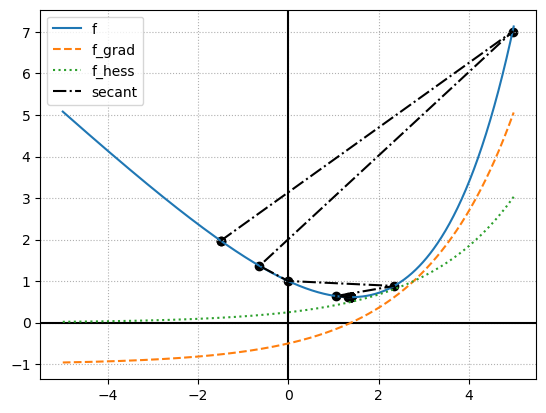

In [7]:
x1_secant, y1_secant = secant(f1d, f1d_grad, initial_x)
plot_convergence_1d(f1d, f1d_grad, f1d_hess, x, x1_secant, y1_secant, 'secant')

In [8]:
def secant_local1(f, f_grad, initial_x, h, epsilon=1e-12, print_all=True):
    # Estimate the hessian locally, twice the amount of gradients evaluations
    nb_iterations = 0
    x_prev = initial_x - 2 * epsilon
    x = initial_x
    x_graph = [initial_x]
    y_graph = [f(initial_x)]
    while (abs(x - x_prev) >= epsilon):
        nb_iterations += 1
        x_prev = x
        # Secant's method
        # Use approximation f''(x) = (f'(x) - f'(x - h)) / h + O(h)
        f_grad_curr = f_grad(x)
        f_hess = (f_grad_curr - f_grad(x - h)) / h
        x = x - (f_grad_curr / f_hess)
        x_graph.append(x)
        y_graph.append(f(x))
        if (print_all):
            print(f"Iteration {nb_iterations}, x = {x}, f(x) = {f(x)}")
    if (print_all):
        print(f"#iterations = {nb_iterations}, #gradient = {2*nb_iterations}")
    return x_graph, y_graph

Iteration 1, x = 5.131047511983283, f(x) = 7.876421813887614
Iteration 2, x = 3.395898436704857, f(x) = 2.066834587211824
Iteration 3, x = 2.096174395047057, f(x) = 0.7560158253549027
Iteration 4, x = 1.4835416878070136, f(x) = 0.6161086895656942
Iteration 5, x = 1.3862279659242513, f(x) = 0.6137056399821776
Iteration 6, x = 1.3862960359614123, f(x) = 0.6137056388808109
Iteration 7, x = 1.3862943189006605, f(x) = 0.6137056388801099
Iteration 8, x = 1.386294362184167, f(x) = 0.6137056388801092
Iteration 9, x = 1.3862943610930623, f(x) = 0.6137056388801094
Iteration 10, x = 1.386294361120567, f(x) = 0.6137056388801094
Iteration 11, x = 1.3862943611198735, f(x) = 0.6137056388801094
#iterations = 11, #gradient = 22


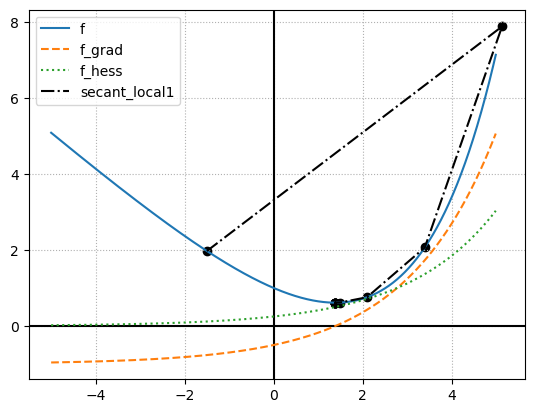

In [9]:
h = 0.1
x1_secant_local1, y1_secant_local1 = secant_local1(f1d, f1d_grad, initial_x, h)
plot_convergence_1d(f1d, f1d_grad, f1d_hess, x, x1_secant_local1, y1_secant_local1, 'secant_local1')

In [10]:
def secant_local2(f, f_grad, initial_x, h, epsilon=1e-12, print_all=True):
    # Estimate the hessian locally, three times the amount of gradients evaluations
    nb_iterations = 0
    x_prev = initial_x - 2 * epsilon
    x = initial_x
    x_graph = [initial_x]
    y_graph = [f(initial_x)]
    while (abs(x - x_prev) >= epsilon):
        nb_iterations += 1
        x_prev = x
        # Secant's method
        # Use approximation f''(x) = (1/2 * f'(x + h) - 1/2 * f'(x - h)) / h + O(h^2)
        f_hess = (f_grad(x + h) - f_grad(x - h)) / (2 * h)
        x = x - (f_grad(x) / f_hess)
        x_graph.append(x)
        y_graph.append(f(x))
        if (print_all):
            print(f"Iteration {nb_iterations}, x = {x}, f(x) = {f(x)}")
    if (print_all):
        print(f"#iterations = {nb_iterations}, #gradient = {3*nb_iterations}")
    return x_graph, y_graph

Iteration 1, x = 4.965305852257543, f(x) = 7.0076799165720525
Iteration 2, x = 3.300085202664721, f(x) = 1.907116453518412
Iteration 3, x = 2.068765225642366, f(x) = 0.7446035358871197
Iteration 4, x = 1.4907891225326604, f(x) = 0.6164835966335889
Iteration 5, x = 1.3890196322736734, f(x) = 0.6137074964994815
Iteration 6, x = 1.3862973514779826, f(x) = 0.6137056388823448
Iteration 7, x = 1.3862943623677446, f(x) = 0.6137056388801092
Iteration 8, x = 1.3862943611204106, f(x) = 0.6137056388801094
Iteration 9, x = 1.3862943611198908, f(x) = 0.6137056388801092
#iterations = 9, #gradient = 27


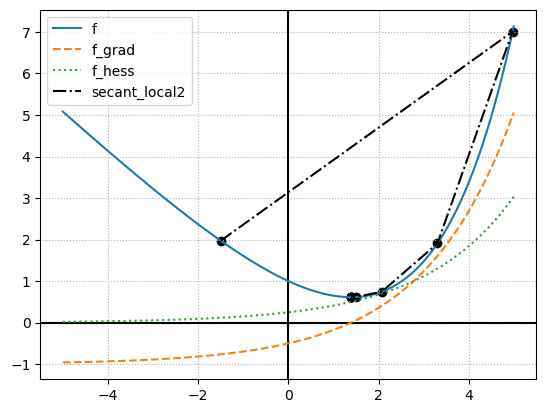

In [11]:
x1_secant_local2, y1_secant_local2 = secant_local2(f1d, f1d_grad, initial_x, h)
plot_convergence_1d(f1d, f1d_grad, f1d_hess, x, x1_secant_local2, y1_secant_local2, 'secant_local2')

In [12]:
def secant_local4(f, f_grad, initial_x, h, epsilon=1e-12, print_all=True):
    # Estimate the hessian locally, five times the amount of gradients evaluations
    nb_iterations = 0
    x_prev = initial_x - 2 * epsilon
    x = initial_x
    x_graph = [initial_x]
    y_graph = [f(initial_x)]
    while (abs(x - x_prev) >= epsilon):
        nb_iterations += 1
        x_prev = x
        # Secant's method
        # Use approximation f''(x) = (-1/12 * f'(x + 2h) + 2/3 * f'(x + h) - 2/3 * f'(x - h) + 1/12 * f'(x - 2h)) / h + O(h^4)
        f_hess = (-f_grad(x + 2*h) + 8*f_grad(x + h) - 8*f_grad(x - h) + f_grad(x - 2*h)) / (12 * h)
        x = x - (f_grad(x) / f_hess)
        x_graph.append(x)
        y_graph.append(f(x))
        if (print_all):
            print(f"Iteration {nb_iterations}, x = {x}, f(x) = {f(x)}")
    if (print_all):
        print(f"#iterations = {nb_iterations}, #gradient = {5*nb_iterations}")
    return x_graph, y_graph

Iteration 1, x = 4.968001414352119, f(x) = 7.021132197209952
Iteration 2, x = 3.3016365181233884, f(x) = 1.9096057111208427
Iteration 3, x = 2.069207566564936, f(x) = 0.7447834978462726
Iteration 4, x = 1.4906760677710624, f(x) = 0.6164775361544115
Iteration 5, x = 1.3889714496965455, f(x) = 0.6137074313806123
Iteration 6, x = 1.3862961514640266, f(x) = 0.6137056388809106
Iteration 7, x = 1.386294361120319, f(x) = 0.6137056388801092
Iteration 8, x = 1.3862943611198908, f(x) = 0.6137056388801092
#iterations = 8, #gradient = 40


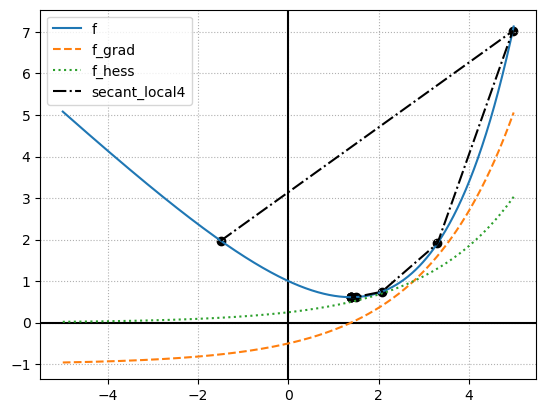

In [13]:
x1_secant_local4, y1_secant_local4 = secant_local4(f1d, f1d_grad, initial_x, h)
plot_convergence_1d(f1d, f1d_grad, f1d_hess, x, x1_secant_local4, y1_secant_local4, 'secant_local4')

In [14]:
def secant_hybrid(f, f_grad, initial_x, h, epsilon=1e-12, print_all=True):
    # Start with O(h) local estimate of hessian until the diff in x < h, then standard secant
    # Store previous x and f_grad to reduce the number of function calls
    nb_iterations = 0
    nb_additional_grad_eval = 0
    x_prev = initial_x - 2 * epsilon
    x = initial_x
    f_grad_prev = f_grad(x_prev)
    f_grad_curr = 0
    x_graph = [x_prev, x]
    y_graph = [f(x_prev), f(x)]
    while (abs(x - x_prev) >= epsilon):
        nb_iterations += 1
        # Secant's method
        f_grad_curr = f_grad(x)
        f_hess = 0
        if (abs(x - x_prev) >= h):
            # Far from optimum => local estimate of hessian
            # Use approximation f''(x) = (f'() - f'(x - h)) / h + O(h)
            f_hess = (f_grad_curr - f_grad(x - h)) / h
            nb_additional_grad_eval += 1
        else:
            # Otherwise use the standard secant method
            # Use approximation f''(x) = (f'(x_t) - f'(x_{t-1})) / (x_t - x_{t-1})
            f_hess = (f_grad_curr - f_grad_prev) / (x - x_prev)
        # Update variables
        x_prev = x
        f_grad_prev = f_grad_curr
        x = x - (f_grad_curr / f_hess)
        x_graph.append(x)
        y_graph.append(f(x))
        if (print_all):
            print(f"Iteration {nb_iterations}, x = {x}, f(x) = {f(x)}")
    if (print_all):
        print(f"#iterations = {nb_iterations}, #gradient = {nb_iterations + nb_additional_grad_eval}")
    return x_graph, y_graph

Iteration 1, x = 4.965880855010188, f(x) = 7.010547658579854
Iteration 2, x = 3.2578729040864056, f(x) = 1.840576484482371
Iteration 3, x = 2.011785764808428, f(x) = 0.7225618692670301
Iteration 4, x = 1.4611174457830982, f(x) = 0.6151228808789453
Iteration 5, x = 1.385825374278183, f(x) = 0.6137056938629759
Iteration 6, x = 1.3862856427220134, f(x) = 0.613705638899112
Iteration 7, x = 1.3862943621421346, f(x) = 0.6137056388801094
Iteration 8, x = 1.3862943611198884, f(x) = 0.6137056388801094
Iteration 9, x = 1.3862943611198906, f(x) = 0.6137056388801094
#iterations = 9, #gradient = 13


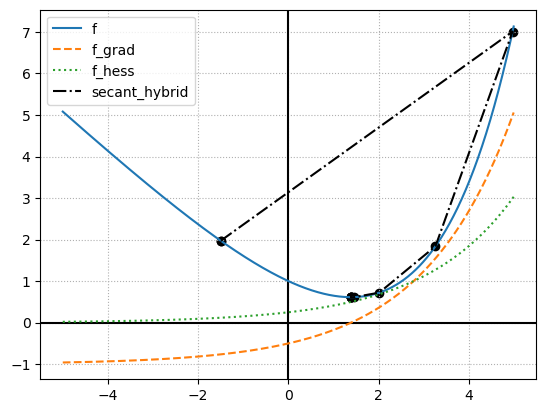

In [15]:
x1_secant_hybrid, y1_secant_hybrid = secant_hybrid(f1d, f1d_grad, initial_x, h)
plot_convergence_1d(f1d, f1d_grad, f1d_hess, x, x1_secant_hybrid, y1_secant_hybrid, 'secant_hybrid')